In [42]:
import numpy as np
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
matplotlib.rcParams['figure.figsize']=(10,6)

In [43]:
import warnings 
warnings.filterwarnings('ignore')

In [44]:
# Load the dataset
df_imdb = pd.read_csv('IMDb Movies India.csv',encoding='latin')
df_imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [45]:
# Display missing values summary
df_imdb.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [46]:
df_imdb.isnull().sum()*100/len(df_imdb)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [47]:
df_imdb.shape

(15509, 10)

In [48]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [49]:
df_imdb.drop_duplicates(inplace=True)

In [50]:
df_imdb.dropna(inplace=True)

In [51]:
df_imdb.shape

(5659, 10)

In [52]:
df_imdb.Year

1        (2019)
3        (2019)
5        (1997)
6        (2005)
8        (2012)
          ...  
15493    (2015)
15494    (2001)
15503    (1989)
15505    (1999)
15508    (1998)
Name: Year, Length: 5659, dtype: object

In [53]:
# Extraction of digits from the Year Column
df_imdb.Year = df_imdb.Year.str.strip('()')
df_imdb.Duration = df_imdb.Duration.str.split(' ').str.get(0)
df_imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [54]:
# Dropping Unwanted Columns 
df_imdb = df_imdb.drop(columns=['Name','Director', 'Actor 1', 'Actor 2', 'Actor 3'])
df_imdb.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,Drama,7.0,8
3,2019,110,"Comedy, Romance",4.4,35
5,1997,147,"Comedy, Drama, Musical",4.7,827
6,2005,142,"Drama, Romance, War",7.4,"1,086"
8,2012,82,"Horror, Mystery, Thriller",5.6,326


In [55]:
df_imdb.Genre.value_counts()

Genre
Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: count, Length: 376, dtype: int64

In [56]:
df_imdb['Genre1'] = df_imdb.Genre.str.split(',',expand=True).get(0)
df_imdb['Genre2'] = df_imdb.Genre.str.split(',',expand=True).get(1)
df_imdb['Genre3'] = df_imdb.Genre.str.split(',',expand=True).get(2)

In [57]:
df_imdb.head()

,Year,Duration,Genre,Rating,Votes,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,"1,086",Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Horror,Mystery,Thriller


In [58]:
df_imdb.isnull().sum()

Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Genre1         0
Genre2      1658
Genre3      3340
dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_imdb['Genre1'] = lb.fit_transform(df_imdb['Genre1'])
df_imdb['Genre2'] = lb.fit_transform(df_imdb['Genre2'])
df_imdb['Genre3'] = lb.fit_transform(df_imdb['Genre3'])

In [60]:
df_imdb[['Genre2','Genre3']] = df_imdb[['Genre2','Genre3']].fillna(0)

In [61]:
df_imdb.head()

,Year,Duration,Genre,Rating,Votes,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,7,18,20
3,2019,110,"Comedy, Romance",4.4,35,4,13,20
5,1997,147,"Comedy, Drama, Musical",4.7,827,4,5,11
6,2005,142,"Drama, Romance, War",7.4,"1,086",7,13,18
8,2012,82,"Horror, Mystery, Thriller",5.6,326,11,12,17


In [62]:
df_imdb.dtypes

Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Genre1        int32
Genre2        int32
Genre3        int32
dtype: object

In [63]:
df_imdb['Votes'] = df_imdb.Votes.str.replace(',','')

In [64]:
df_imdb['Year'] = df_imdb['Year'].astype('int64')
df_imdb['Duration'] = df_imdb['Duration'].astype('int64')
df_imdb['Votes'] = df_imdb['Votes'].astype('int64')

In [65]:
df_imdb.dtypes

Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Genre1        int32
Genre2        int32
Genre3        int32
dtype: object

In [66]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   int64  
 1   Duration  5659 non-null   int64  
 2   Genre     5659 non-null   object 
 3   Rating    5659 non-null   float64
 4   Votes     5659 non-null   int64  
 5   Genre1    5659 non-null   int32  
 6   Genre2    5659 non-null   int32  
 7   Genre3    5659 non-null   int32  
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 331.6+ KB


In [67]:
df_imdb.head()

,Year,Duration,Genre,Rating,Votes,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,7,18,20
3,2019,110,"Comedy, Romance",4.4,35,4,13,20
5,1997,147,"Comedy, Drama, Musical",4.7,827,4,5,11
6,2005,142,"Drama, Romance, War",7.4,1086,7,13,18
8,2012,82,"Horror, Mystery, Thriller",5.6,326,11,12,17


### Data Visualization

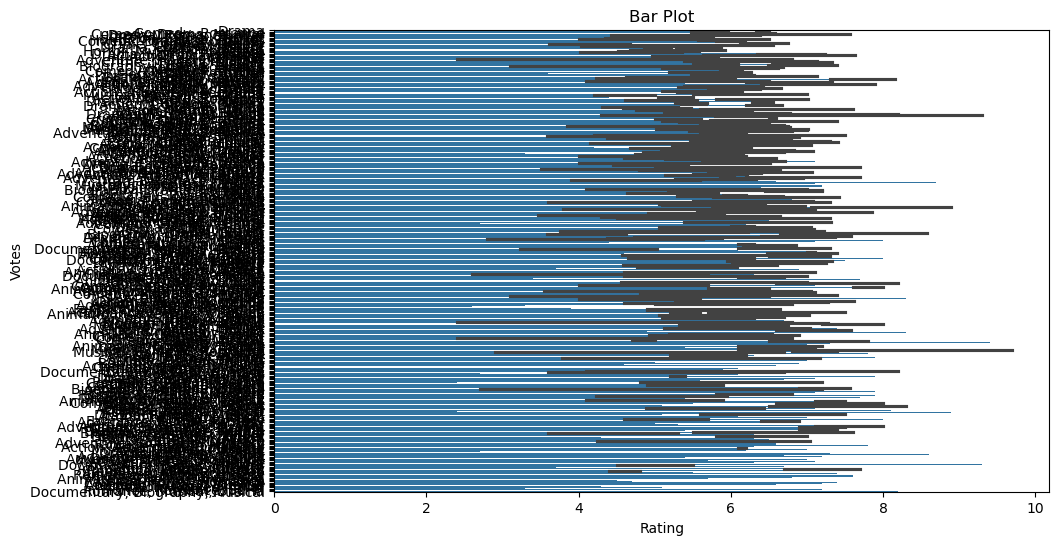

In [68]:
sns.barplot(x='Rating',y='Genre',data = df_imdb)
plt.title('Bar Plot')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

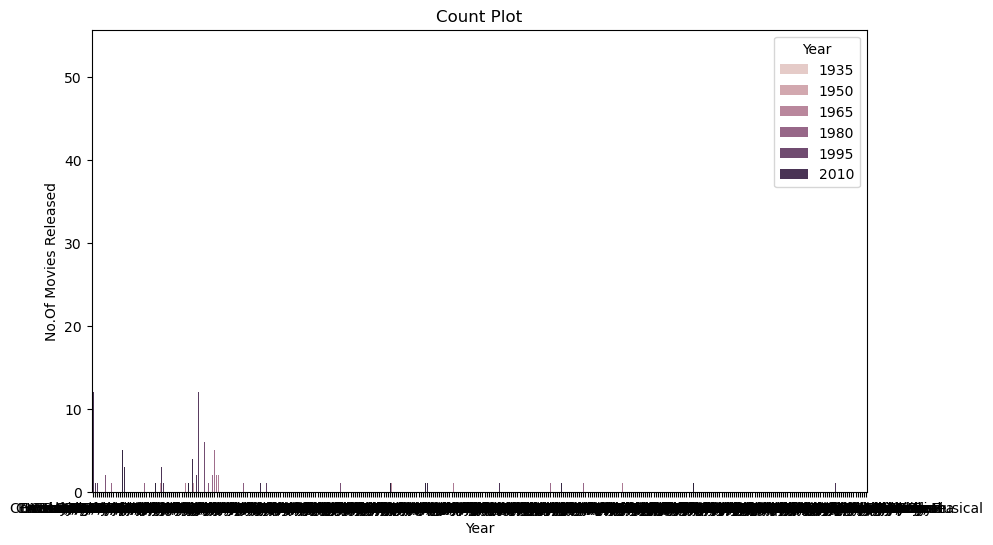

In [69]:
sns.countplot(df_imdb,x='Genre',hue='Year')
plt.title('Count Plot')
plt.xlabel('Year')
plt.ylabel('No.Of Movies Released')
plt.show()

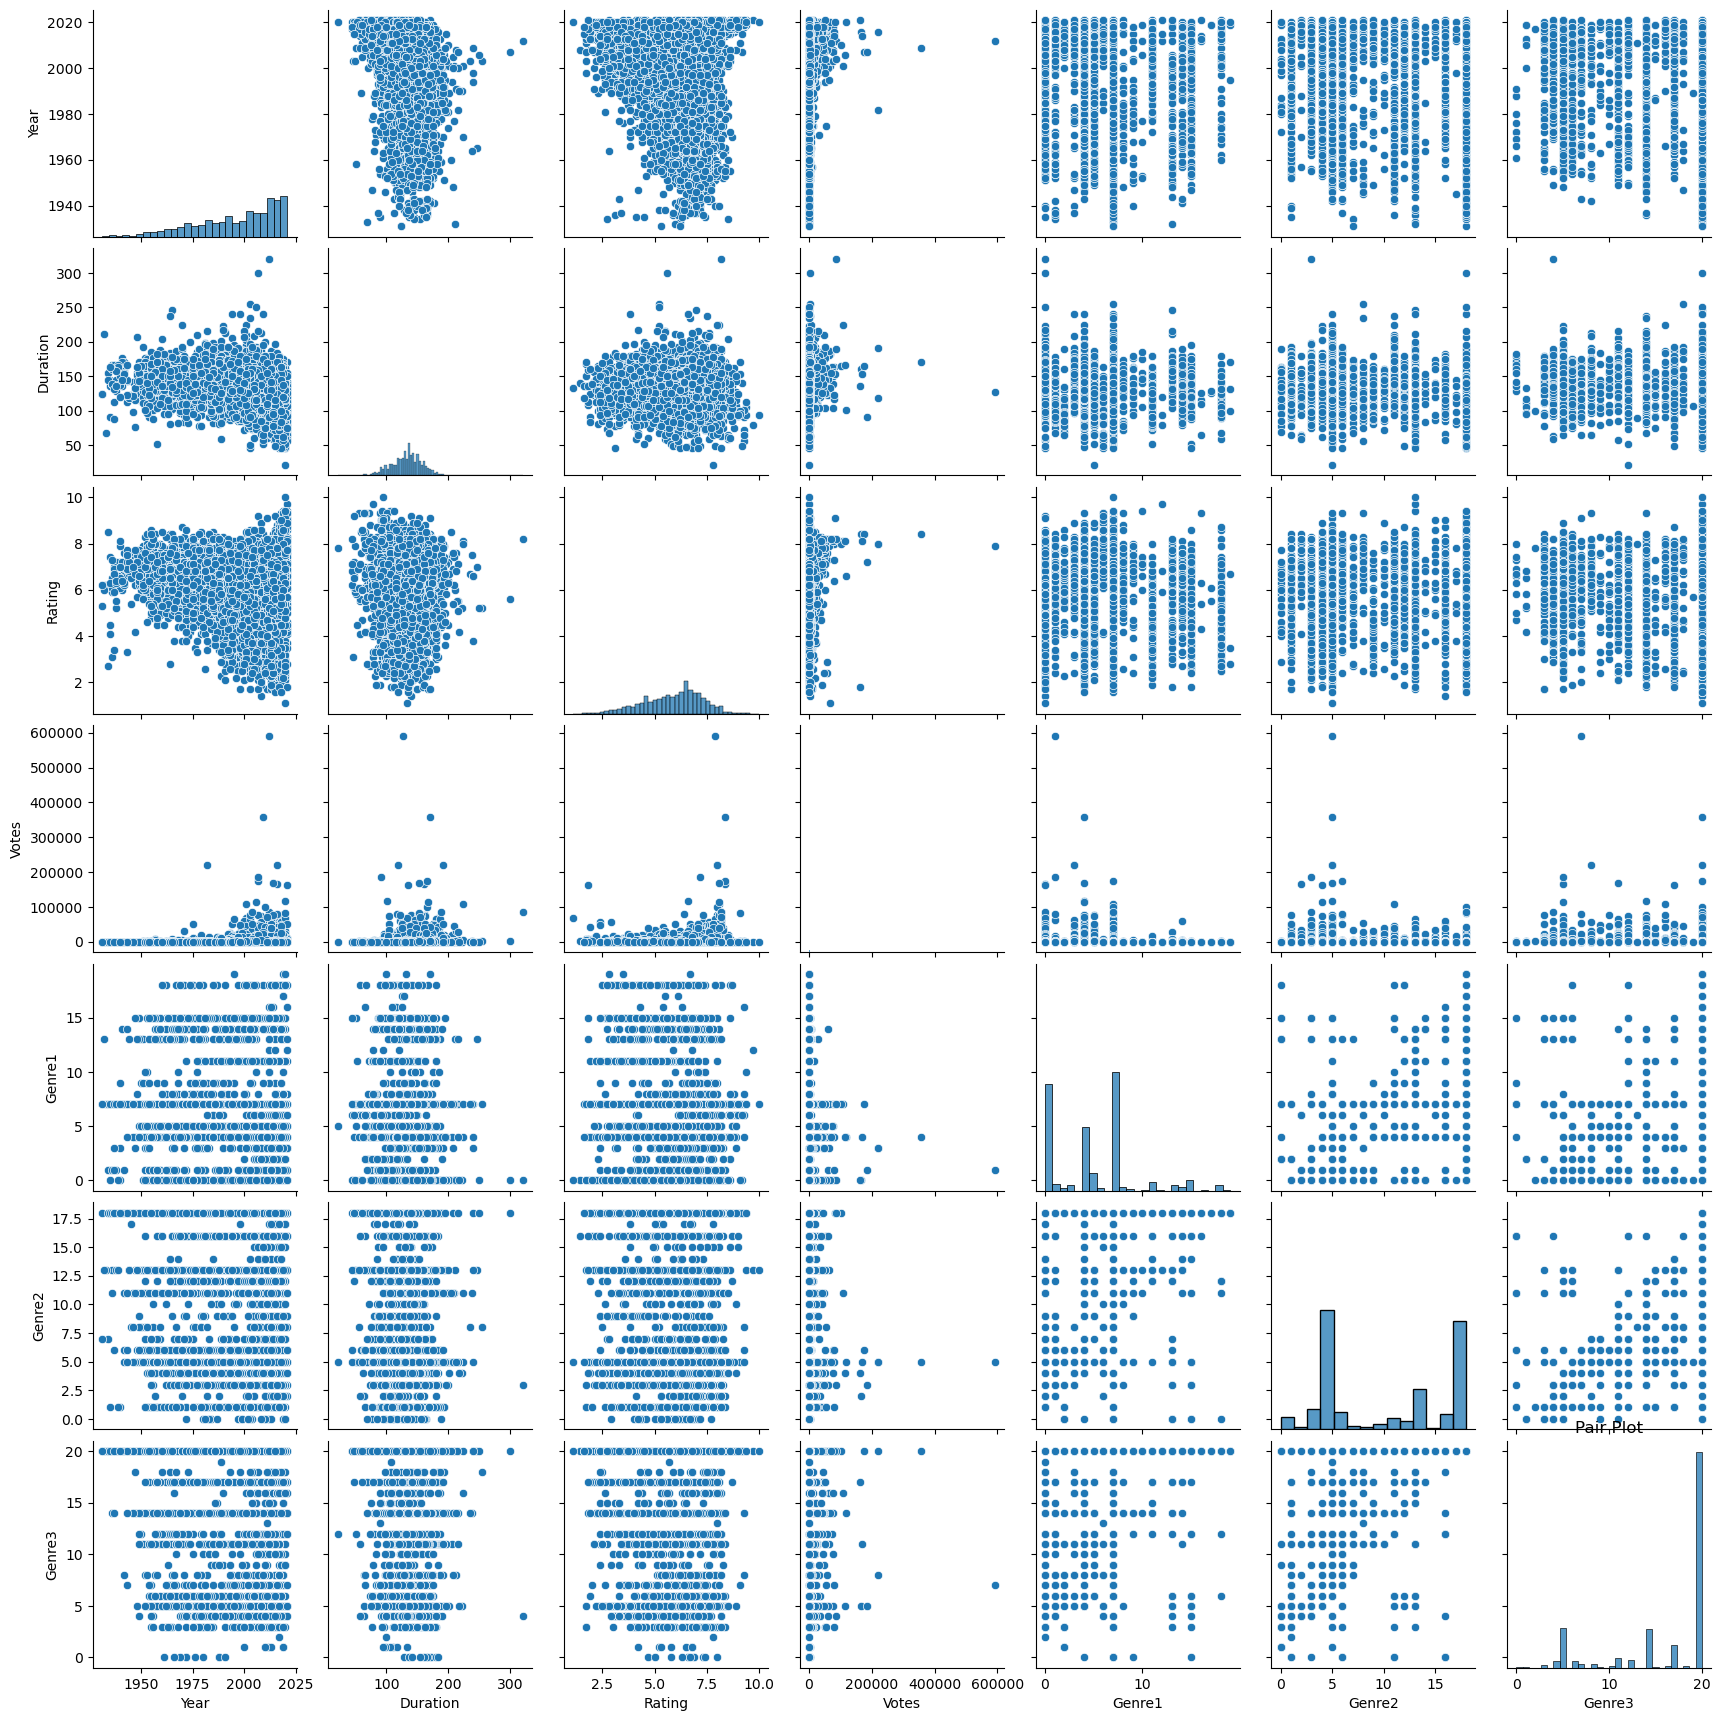

In [70]:
sns.pairplot(df_imdb)
plt.title('Pair Plot')
plt.show()

<Axes: >

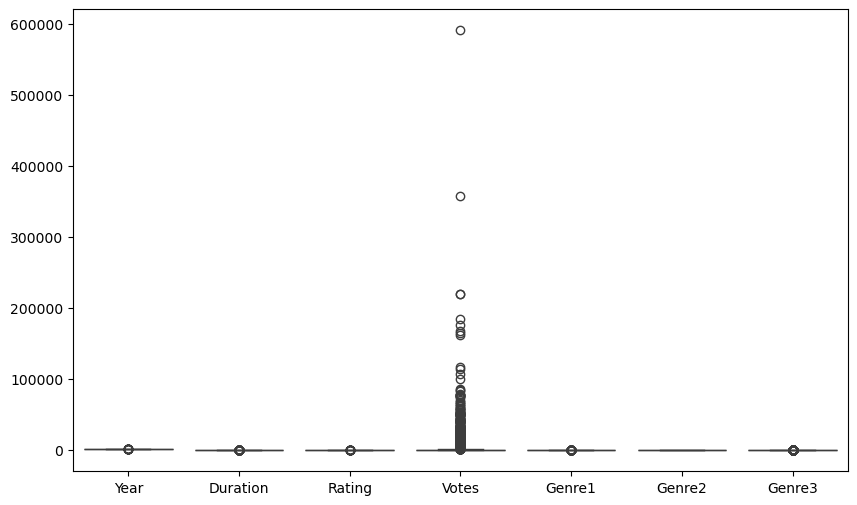

In [71]:
sns.boxplot(data = df_imdb)

### Removing Outliers

In [72]:
from scipy import stats
import numpy as np

# Calculate the z-scores for each column
z_scores = np.abs(stats.zscore(df_imdb[['Year','Duration','Rating','Votes','Genre1','Genre2','Genre3']]))
threshold = 3  # Typical threshold; you can adjust this

# Keep rows where all z-scores are less than the threshold
df_imdb_filtered = df_imdb[(z_scores < threshold).all(axis=1)]

# Print the shape before and after removing outliers
print('Before Removing Outliers:')
print(df_imdb.shape)
print('After Removing Outliers:')
print(df_imdb_filtered.shape)

Before Removing Outliers:
(5659, 8)
After Removing Outliers:
(5432, 8)


In [73]:
print(df_imdb.isnull().sum())
print(df_imdb.dtypes)

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Genre1      0
Genre2      0
Genre3      0
dtype: int64
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Genre1        int32
Genre2        int32
Genre3        int32
dtype: object


### Model Training and Testing

In [74]:
X = df_imdb.drop(columns = ['Genre','Rating'])
y = df_imdb['Rating']

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Linear Regression Training Score:", model.score(X_train, y_train))
pred = r2_score(y_test,y_pred)
print('Linear Regression Accuracy:', pred)

Linear Regression Training Score: 0.08475858310140383
Linear Regression Accuracy: 0.08149963664089033


In [76]:
# Function to collect and preprocess user input
def get_user_input():
    # Collecting input from the user
    year = int(input("Enter the year of the movie (e.g., 2023): "))
    duration = int(input("Enter the duration of the movie in minutes (e.g., 150): "))
    votes = int(input("Enter the number of votes (e.g., 50000): "))
    
    # Genre encoding (You can customize this part to make it more user-friendly)
    genre1 = int(input("Enter the encoded value for Genre1 (e.g., 2): "))
    genre2 = int(input("Enter the encoded value for Genre2 (e.g., 5): "))
    genre3 = int(input("Enter the encoded value for Genre3 (e.g., 1): "))
    
    # Creating an array of the input data
    input_data = np.array([[year, duration, votes, genre1, genre2, genre3]])
    
    return input_data

# Get user input
user_data = get_user_input()

# Apply the same preprocessing (scaling) used during training
user_data_scaled = scaler.transform(user_data)  

# Predict using the Linear Regression model
user_pred = model.predict(user_data_scaled)

# Display the prediction result
print(f"\nPredicted IMDb Rating for the entered movie details: {user_pred[0]:.2f}")



Predicted IMDb Rating for the entered movie details: 5.63
